# Settings

!pip install timm \
!git clone https://github.com/moskomule/sam.pytorch.git \
!git clone https://github.com/marcellodebernardi/loss-landscapes.git \
-- loss_landscape 폴더 꺼내쓰기 \
-- two devices 관련 오류 뜨면 해당 파일로 가서 parameter.to(torch.device('cuda')) \
!git clone https://github.com/amirgholami/PyHessian.git

In [1]:
!nvidia-smi

Wed Dec  7 19:20:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:05.0 Off |                  Off |
| N/A   39C    P0    39W / 300W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:00:06.0 Off |                  Off |
| N/A   

In [ ]:
!pwd

In [ ]:
import gc
gc.collect()
clear()

In [ ]:
import torch

torch.cuda.is_available()

# Example

## Train Model
Train model, save loss landscapes

In [ ]:
%%time
# arch: resnet10t, resnet50, vit_tiny_patch16_224, vit_small_patch32_224, vit_base_patch8_224
# https://github.com/rwightman/pytorch-image-models/blob/main/results/results-imagenet.csv
# optimizer_plus: base, sam
# pretrained_path: False, imagenet

!python main.py --gpu_num 1 \
                --path_to_data ./Data \
                --pretrained_path False \
                --arch vit_tiny_patch16_224 \
                --optimizer SGD \
                --optimizer_plus sam \
                --batch_size 32 \
                --lr 0.001 \
                --momentum 0.5 \
                --patience 5 \
                --n_epochs 100

In [1]:
# Patience 30, Epoch 300
import os
import datetime
import pytz
import torch
import gc

# for selected settings
ARCH = ['vit_tiny_patch16_224','resnet10t','resnet10t','vit_tiny_patch16_224', 'vit_base_patch8_224']
PRETRAIN = ['imagenet','imagenet','False','False']
MOMENTUM = [0.1,0.9,0.9,0.9]
BATCH_SIZE = [8,8,8,8]
LR = [0.001,0.001,0.001,0.001]

OPT = 'base' # 'base', 'sam'
i = 0 # 0,1,2,3

!python main.py --gpu_num 0 \
                --path_to_data ./Data \
                --pretrained_path False \
                --arch {ARCH[4]} \
                --optimizer SGD \
                --optimizer_plus base \
                --batch_size 8 \
                --lr 0.001 \
                --momentum 0.9 \
                --patience 12 \
                --n_epochs 300

Available GPU count:3
Data directory:  ./Data
Batch size:  8
Image size:  224
Train Epoch: 1 [0/11889(0%)]	Train Loss: 0.831506
Train Epoch: 1 [1600/11889(13%)]	Train Loss: 0.938100
Train Epoch: 1 [3200/11889(27%)]	Train Loss: 0.688195
Train Epoch: 1 [4800/11889(40%)]	Train Loss: 0.438638
Train Epoch: 1 [6400/11889(54%)]	Train Loss: 0.816601
Train Epoch: 1 [8000/11889(67%)]	Train Loss: 0.688081
Train Epoch: 1 [9600/11889(81%)]	Train Loss: 0.809639
Train Epoch: 1 [11200/11889(94%)]	Train Loss: 0.687817
1

[EPOCH: 1], 	Val Loss: 0.7135, 	Val Accuracy: 0.59 %

*****************************************************
best record: [epoch 1], [val loss 0.71354], [val acc 0.59476]
*****************************************************
Train Epoch: 2 [0/11889(0%)]	Train Loss: 1.047240
Train Epoch: 2 [1600/11889(13%)]	Train Loss: 0.810865
Train Epoch: 2 [3200/11889(27%)]	Train Loss: 0.661438
Train Epoch: 2 [4800/11889(40%)]	Train Loss: 0.937840
Train Epoch: 2 [6400/11889(54%)]	Train Loss: 0.563290


In [ ]:
# 3트 (long-training + vit_base)
# Patience 30, Epoch 300
import os
import datetime
import pytz
import torch
import gc


# for selected settings
ARCH = ['vit_tiny_patch16_224','resnet10t','resnet10t','vit_tiny_patch16_224','vit_base_patch8_224']
PRETRAIN = ['imagenet','imagenet','False','False', 'imagenet', 'False']
MOMENTUM = [0.1,0.9,0.9,0.9,0.9,0.9]
BATCH_SIZE = [8,8,8,8,8,8]
LR = [0.001,0.001,0.001,0.001,0.001,0.001]

OPT = 'base' # 'base', 'sam'

for i in [3,4,5]:
    print(datetime.datetime.now(pytz.timezone('Europe/London')).strftime('%Y-%m-%d-%H-%M-%S'))
    print(f'Start with LR = {LR[i]}, MOMENTUM = {MOMENTUM[i]}, BATCH_SIZE = {BATCH_SIZE[i]}, ARCH = {ARCH[i]}, SAM = {OPT}, PRETRAIN = {PRETRAIN[i]}')
    os.system(f"python main.py --gpu_num 1 \
                --path_to_data ./Data \
                --pretrained_path {PRETRAIN[i]} \
                --arch {ARCH[i]} \
                --optimizer SGD \
                --optimizer_plus {OPT} \
                --batch_size {BATCH_SIZE[i]} \
                --lr {LR[i]} \
                --momentum {MOMENTUM[i]} \
                --patience 30 \
                --n_epochs 300")
    print(f'Done with LR = {LR[i]}, MOMENTUM = {MOMENTUM[i]}, BATCH_SIZE = {BATCH_SIZE[i]}, ARCH = {ARCH[i]}, SAM = {OPT}, PRETRAIN = {PRETRAIN[i]}')
    torch.cuda.empty_cache()
    gc.collect() 

2022-12-09-20-56-56
Start with LR = 0.001, MOMENTUM = 0.9, BATCH_SIZE = 8, ARCH = vit_tiny_patch16_224, SAM = base, PRETRAIN = False
Done with LR = 0.001, MOMENTUM = 0.9, BATCH_SIZE = 8, ARCH = vit_tiny_patch16_224, SAM = base, PRETRAIN = False
2022-12-09-22-22-18
Start with LR = 0.001, MOMENTUM = 0.9, BATCH_SIZE = 8, ARCH = vit_base_patch8_224, SAM = base, PRETRAIN = imagenet


## Hessian eigenvalues
https://github.com/xxxnell/how-do-vits-work/issues/12

In [ ]:
%%time

!python landscape.py --HDVW False \
                     --Hess True \
                     --data_ratio 0.1 \
                     --gpu_num 0 \
                     --path_to_model home/ViT_SAM/results/resnet10t/sam/2022-12-05-11-23-35/model-epoch35-loss_val0.49-acc_val0.82.pt

In [ ]:
import pickle
import numpy as np

PATH = './results/resnet152/base/2022-12-13-03-30-32/'
with open(f"{PATH}/Hessian_eig_list", "rb") as fp:   # Unpickling
    see = pickle.load(fp)
    
print(round(np.array(see).min(),1), round(np.array(see).mean(),1),round(np.array(see).max(),1))

In [4]:
%%time

!python landscape.py --HDVW False \
                     --Hess True \
                     --data_ratio 0.1 \
                     --gpu_num 0 \
                     --path_to_model home/ViT_SAM/results/vit_base_patch32_224_sam/base/2022-12-12-02-04-19/model-epoch21-loss_val0.37-acc_val0.94.pt

Data directory:  ./Data/
Batch size:  8
Image size:  224
100%|█████████████████████████████████████████| 149/149 [42:14<00:00, 17.01s/it]
Done saving. Check ./results/vit_base_patch32_224_sam/base/2022-12-12-02-04-19/
CPU times: user 21.1 s, sys: 4.42 s, total: 25.5 s
Wall time: 42min 35s


In [5]:
import pickle
import numpy as np

PATH = './results/vit_base_patch32_224_sam/base/2022-12-12-02-04-19/'
with open(f"{PATH}/Hessian_eig_list", "rb") as fp:   # Unpickling
    see = pickle.load(fp)
    
print(round(np.array(see).min(),1), round(np.array(see).mean(),1),round(np.array(see).max(),1))

-119.7 26.4 7927.8


## Loss Landscape

#### How Do ViTs Work - Loss Landscape
https://github.com/xxxnell/how-do-vits-work

In [ ]:
import datetime
import pytz

print(datetime.datetime.now(pytz.timezone('Europe/London')).strftime('%Y-%m-%d-%H-%M-%S'))

!python landscape.py --HDVW True \
                     --HDVW_n 20 \
                     --HDVW_zlim 0.4 \
                     --data_ratio 0.01 \
                     --scale 1e-0 \
                     --gpu_num 0 \
                     --path_to_model home/ViT_SAM/home/ViT_SAM/results/vit_base_patch32_224_sam/base/2022-12-12-02-04-19/model-epoch21-loss_val0.37-acc_val0.94.pt

In [5]:
%%time
# Get loss landscape csv and save loss landscape figure

!python landscape.py --HDVW True \
                     --HDVW_n 21 \
                     --HDVW_zlim 0.4 \
                     --data_ratio 0.1 \
                     --scale 1e-1 \
                     --gpu_num 0 \
                     --path_to_model home/ViT_SAM/results/vit_tiny_patch16_224/base/2022-12-09-15-09-32/model-epoch16-loss_val0.36-acc_val0.95.pt

Data directory:  ./Data/
Batch size:  8
Image size:  224
<class 'float'>
Grid:  [-0.1 -0.1], NLL: 0.3673, Cutoffs: 0.0 %, 90.0 %, Accs: 94.108 %, 0.000 %, Uncs: 0.000 %, 100.000 %, IoUs: 88.552 %, 0.000 %, Freqs: 100.000 %, 0.000 %, Top-5: 100.000 %, Brier: 0.195, ECE: 22.432 %, ECE±: -21.454 %
Grid:  [-0.09 -0.1 ], NLL: 0.3635, Cutoffs: 0.0 %, 90.0 %, Accs: 94.865 %, 0.000 %, Uncs: 0.000 %, 100.000 %, IoUs: 89.956 %, 0.000 %, Freqs: 100.000 %, 0.000 %, Top-5: 100.000 %, Brier: 0.191, ECE: 22.204 %, ECE±: -22.203 %
Grid:  [-0.08 -0.1 ], NLL: 0.3610, Cutoffs: 0.0 %, 90.0 %, Accs: 95.034 %, 0.000 %, Uncs: 0.000 %, 100.000 %, IoUs: 90.269 %, 0.000 %, Freqs: 100.000 %, 0.000 %, Top-5: 100.000 %, Brier: 0.189, ECE: 22.708 %, ECE±: -22.283 %
Grid:  [-0.07 -0.1 ], NLL: 0.3583, Cutoffs: 0.0 %, 90.0 %, Accs: 95.455 %, 0.000 %, Uncs: 0.000 %, 100.000 %, IoUs: 91.058 %, 0.000 %, Freqs: 100.000 %, 0.000 %, Top-5: 100.000 %, Brier: 0.187, ECE: 23.198 %, ECE±: -22.667 %
Grid:  [-0.06 -0.1 ], NLL: 0.

In [ ]:
from get_landscape import HDVW_csv2fig

CSV_PATH = 'home/ViT_SAM/results/vit_tiny_patch16_224/base/2022-12-06-08-25-10/scale-1_n-21_loss_landscape_HDVW.csv'
csv_path = '/' + CSV_PATH
HDVW_csv2fig(csv_path, z_lim=0.5)

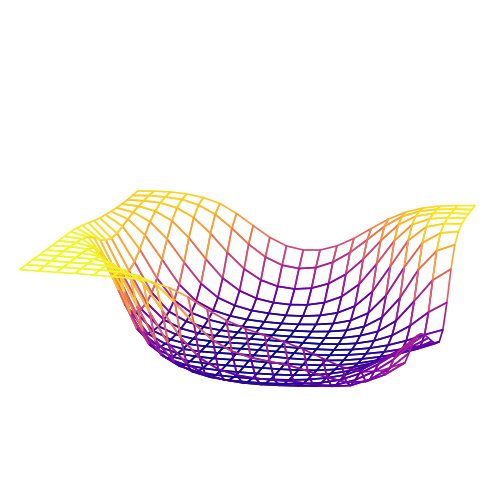

In [2]:
# From loss landscape csv, plot and save loss landscape figure

from get_landscape import HDVW_csv2fig

CSV_PATH = 'home/ViT_SAM/results/resnet10t/base/2022-12-09-06-27-57/0.1_scale-10_n-20_loss_landscape_HDVW.png'
csv_path = '/' + CSV_PATH
HDVW_csv2fig(csv_path, z_lim=0.5)

#### not HDVW - Loss Landscape

In [ ]:
# Plot and save loss landscape figure

!python landscape.py --HDVW False \
                     --gpu_num 1 \
                     --path_to_model home/ViT_SAM/results/vit_small_patch32_224/base/2022-12-05-16-06-44/model-epoch01-loss_val0.67-acc_val0.59.pt

## Eval AUC

In [1]:
!python main.py --path_to_data ./Data/ \
                --eval_only True \
                --path_to_eval_model home/ViT_SAM/results/resnet10t/sam/2022-12-10-02-14-45/model-epoch64-loss_val0.45-acc_val0.86.pt

Available GPU count:3
Data directory:  ./Data/
Batch size:  32
Image size:  224
AUC:  0.7113426456282419
Check ./results/resnet10t/sam/2022-12-05-03-28-01/


In [4]:
import os
import glob

for path in glob.glob('/home/ViT_SAM/results/*/*/*/*.pt')[5:6]:
    path = path[1:]
    print(f'Start with {path}')
    os.system(f"python main.py --path_to_data ./Data/ \
                    --eval_only True \
                    --path_to_eval_model {path}")
    print(f'Done with {path}')

Start with home/ViT_SAM/results/resnet10t/sam/2022-12-05-15-26-00/model-epoch14-loss_val0.69-acc_val0.59.pt
Done with home/ViT_SAM/results/resnet10t/sam/2022-12-05-15-26-00/model-epoch14-loss_val0.69-acc_val0.59.pt
